In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)

from scipy.optimize import curve_fit

import misc_util

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [2]:
data_dihadrons = uproot3.open('../in/data_dihadrons_30pc.root')['dihadrons'].pandas.df()
data_hadrons = uproot3.open('../in/data_hadrons_30pc.root')['hadrons'].pandas.df()

In [3]:
protons = data_hadrons.query("h_pid == 2212")
pip = data_hadrons.query("h_pid == 211")
pim = data_hadrons.query("h_pid == -211")

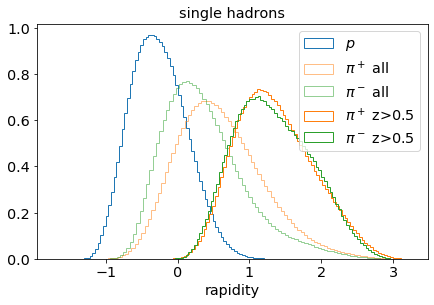

In [13]:
for df,name,col,alpha in zip((protons,pip,pim, pip.query("z>0.5"), pim.query("z>0.5")),
                   "$p$;$\pi^+$ all;$\pi^-$ all;$\pi^+$ z>0.5;$\pi^-$ z>0.5".split(";"),
                  "tab:blue tab:orange tab:green tab:orange tab:green".split(),
                                [1,0.5,0.5,1,1]):
    plt.hist(df.h_cm_rap, label=name,bins=100,histtype='step',color=col,alpha=alpha,density=True)
plt.xlabel('rapidity')
plt.gca().set_title("single hadrons")
plt.legend()

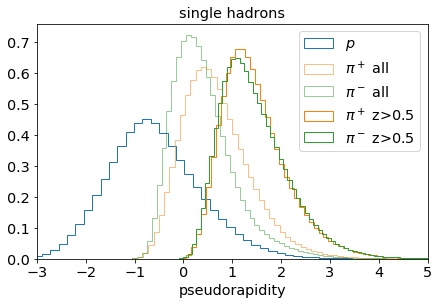

In [15]:
for df,name,col,alpha in zip((protons,pip,pim, pip.query("z>0.5"), pim.query("z>0.5")),
                   "$p$;$\pi^+$ all;$\pi^-$ all;$\pi^+$ z>0.5;$\pi^-$ z>0.5".split(";"),
                  "tab:blue tab:orange tab:green tab:orange tab:green".split(),
                                [1,0.5,0.5,1,1]):
    plt.hist(df.h_cm_eta, label=name,bins=100,histtype='step',color=col,alpha=alpha,density=True)
plt.xlabel('pseudorapidity')
plt.gca().set_xlim(-3, 5)
plt.gca().set_title("single hadrons")
plt.legend()

ab
